Normality Test: A test to see whether a data set is well-modeled by a normal distribution and to compute how likely it is for a random variable underlying the data set to be normally distributed.

In [94]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import shapiro
from scipy.stats import norm
import pandas as pd

#### Data input.

In [95]:
Data=pd.read_excel(r'C:\Users\Dheo Callisto\Downloads\Mikroplastik.xlsx',sheet_name='Sheet2')
Data=Data.to_numpy()
Data=Data.T

Lengths=Data[3,4:33]
Amount=Data[7,4:33]

The data is subjectively small, hence why I used Shapiro-Wilk's test instead of Kolmogorov's test.

In [96]:
def shapirowilk(data):
    stat,p=shapiro(data)
    confi=0.05
    if p>confi:
        print(f'Sample looks Gaussian, with p-value = {p}')
    else:
        print(f'Sample does not look Gaussian, with p-value = {p}')

If $p<0.05$, then the sample looks Gaussian (normally distributed).

In [97]:
shapirowilk(Amount)

Sample looks Gaussian, with p-value = 0.42139920592308044


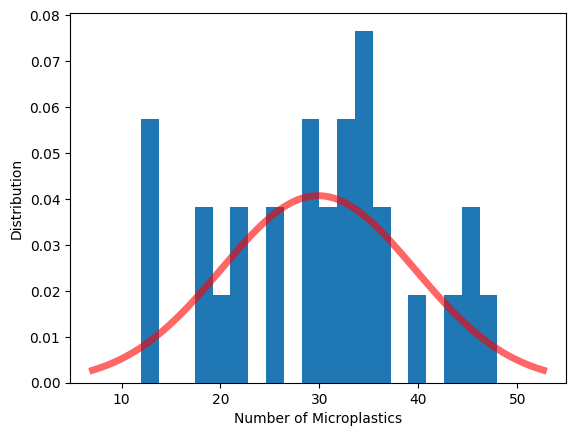

In [98]:
mean=np.mean(Amount)
std=np.std(Amount)
x = np.linspace(norm.ppf(0.01, mean, std), norm.ppf(0.99, mean, std), 100)

fig,ax=plt.subplots()
ax.hist(Amount,bins=20,density=True)
ax.plot(x, norm.pdf(x, mean, std), 'r-', lw=5, alpha=0.6)
ax.set_xlabel('Number of Microplastics')
ax.set_ylabel('Distribution')

plt.show()

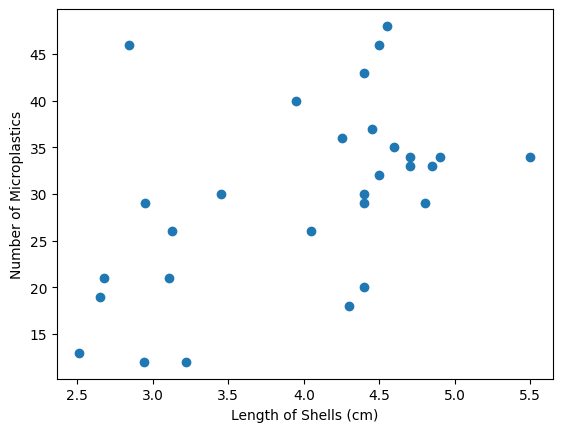

In [99]:
fig,ax=plt.subplots()
ax.scatter(Lengths,Amount)

ax.set_ylabel('Number of Microplastics')
ax.set_xlabel('Length of Shells (cm)')

plt.show()

In [100]:
def LinearRegression(x,y):
    n=len(x)
    Jx=sum(x)
    Jy = sum(y)
    Jxy = sum(x*y)
    Jxs = sum(x*x)
    Denom = n*Jxs-Jx**2
    a0 = ((Jxs*Jy)-(Jx*Jxy))/Denom
    a1 = ((n*Jxy)-(Jx*Jy))/Denom
    return a1,a0

In [101]:
m1,c1=LinearRegression(Lengths,Amount)
print(m1,c1)

6.108911045230171 5.494886718724094


In [102]:
def Rsquared(pred,obs):
    ymean=np.mean(obs)
    sse=np.sum((obs-pred)**2)
    sst=np.sum((obs-ymean)**2)
    r2=1-(sse/sst)
    return r2

In [103]:
ypred=Lengths*m1+c1
R2=Rsquared(ypred,Amount)
print(R2)

0.25984516498211274


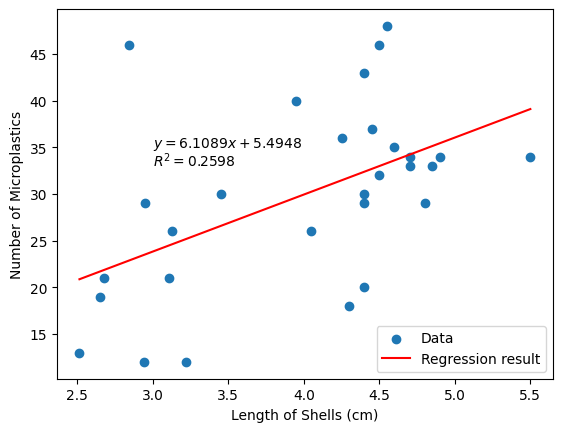

In [106]:
xreg=np.arange(min(Lengths),max(Lengths),0.0001)
yreg=xreg*m1+c1

fig,ax=plt.subplots()
ax.scatter(Lengths,Amount,label='Data')
ax.plot(xreg,yreg,'r-',label='Regression result')
ax.legend()
ax.set_ylabel('Number of Microplastics')
ax.set_xlabel('Length of Shells (cm)')
ax.text(3,35,'$y=6.1089x+5.4948$')
ax.text(3,33,'$R^2=0.2598$')
plt.show()